<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Probabilidad Conjunta y Entropía Cruzada</center></span>

<figure>
<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/7/7a/Bimodal-bivariate.png width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Dinstribución conjunta multimodal</p>
</figcaption>
</figure>

Fuente:<a href="https://commons.wikimedia.org/wiki/File:Bimodal-bivariate.png">Jorgenumata</a>, Public domain, via Wikimedia Commons

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [El ejemplo de la moneda cargada](#El-ejemplo-de-la-moneda-cargada)
* [Función de probabilidad conjunta](#Función-de-probabilidad-conjunta)
* [Distribución marginal](#Distribución-marginal)
* [Correlación](#Correlación)
* [Información mutua](#Información-mutua)
* [Entropía cruzada](#Entropía-cruzada)
* [Entropía cruzada en aprendizaje de máquinas](#Entropía-cruzada-en-aprendizaje-de-máquinas)

## <span style="color:blue">Introducción</span>

En esta lección se introducen los concepto de función de probabilidad conjunta. Se introducen los conceptos de correlación,  información mutua y entropía cruzada.

## <span style="color:blue">El ejemplo de la moneda cargada</span> 

Usaremos el ejemplo de la Variable Bernoulli de la [lección de variables aleatorias](Prob_Variables_Aleatorias.ipynb). En realidad el ejemplo puede reescribirse usando como experimento el lanzamiento de una moneda cargada. Suponemos dos posibles resultados cara $(g=1)$ y sello $g=0$. Suponemos además que $\text{Prob}[g=1]= 0.6$ y por tanto $\text{Prob}[g=0]= 0.4$. El experimento consiste en lanzar tres veces la moneda cargada y anotar el resultado: cara (1) o sello (0).

Ahora definimos dos variables aleatorias. La primera  que llamaremos $X$, corresponde a contar el número de caras que salen. De acuerdo con los resultados de la [lección de variables aleatorias](Prob_Variables_Aleatorias.ipynb), la función de probabilidad de $X$, denotada $p_X$ es dada por extensión de  la siguiente forma:

|Valor |Experimentos| probabilidad cada experimento| probabilidad para este valor de $X$| total|
|---|---|---| ---|---|
|0| 000| $0.4\times 0.4 \times 0.4$|0.064|0.064|
|1| 100| $0.6\times 0.4 \times 0.4$|0.096||
|1| 010| $0.4 \times 0.6\times 0.4$|0.096||
|1| 001| $0.4 \times 0.4\times 0.6$|0.096|0.288|
|2| 110| $0.6\times 0.6 \times 0.4$|0.144||
|2| 011| $0.4 \times 0.6\times 0.6$|0.144||
|2| 101| $0.6 \times 0.4 \times 0.6$|0.144|0.432|
|3| 111| $0.6 \times 0.6\times 0.6$|0.216|0.216 |

Recuerde que obtuvimos que $\mathbb{E}[X]=1.8$.  Además se tiene que $\text{Var}[X]=0.72$ y $\sigma_X = 0.849$

### Ejercicio

Por favor verifique que si $X\sim \text{Binom}(N,\pi)$, entonces 

1. $\mathbb{E}[X]=N\pi$ 
2. $\text{Var}[X]=N\pi(1-\pi)$.

La segunda variable que llamaremos $Y$ se defien como sigue:

$$
Y = \begin{cases}  0, &\text{ si no sale ninguna cara}, \\
1, &\text{ si salen una o dos caras},\\
-1, &\text{ si salen tres caras}.
\end{cases}
$$

La función de probabilidad de  Y , denotada  $p_Y$  es dada por extensión de la siguiente forma:

|Valor |Experimentos| probabilidad cada experimento| probabilidad para este valor de $Y$| total|
|---|---|---| ---|---|
|0| 000| $0.4\times 0.4 \times 0.4$|0.064|0.064|
|1| 100| $0.6\times 0.4 \times 0.4$|0.096||
|1| 010| $0.4 \times 0.6\times 0.4$|0.096||
|1| 001| $0.4 \times 0.4\times 0.6$|0.096||
|1| 110| $0.6\times 0.6 \times 0.4$|0.144||
|1| 011| $0.4 \times 0.6\times 0.6$|0.144||
|1| 101| $0.6 \times 0.4 \times 0.6$|0.144|0.720|
|-1| 111| $0.6 \times 0.6\times 0.6$|0.216|0.216 |

Recuerde que 

$$
\begin{align}
\mathbb{E}[Y] &= 0\times 0.064 +  1\times 0.72 +(-1)\times 0.216 = 0.504\\
\text{Var}[Y] &=  (0-0.504)^2\times 0.064 + (1-0.504)^2\times 0.720 + (-1-0.504)^2\times 0.216 = 0.682\\
\sigma_Y &= 0.826
\end{align}
$$



## <span style="color:blue">Función de probabilidad conjunta</span> 

Abordemos el problema de determinar como está relacionadas (asociadas) estas dos variables. Para empezar observe la siguiente tabla que muestra como coocurren los valores de las dos variables aleatorias


|X/Y|0|1|-1|
|---|---|---|---|
|0|000|---------|---|
|1|---|100 010 001|---|
|2|---|101 110 011|---|
|3|---|---------|111|

La celdas vacias indican parejas de valores $(x,y)$ que no pueden ocurrir. La función de probabilidad conjunta de la variables $X$ y $Y$ se define como la función de dos variables dada por 

$$
p_{XY}(x,y) = \text{Prob}(X=x, Y=y).
$$

En nuestro ejemplo, la función de probabilidad conjunta es definida por extensión de la siguiente forma

|X/Y|0|1|-1|$P_X$|
|---|---|---|---|---|
|0|0.064|0.000|0.000|0.064|
|1|0.000|0.288|0.000|0.288|
|2|0.000|0.432|0.000|0.432|
|3|0.000|0.000| 0.216|0.216|
|$P_Y$|0.064|0.720| 0.216|1.000|


## <span style="color:blue">Distribución marginal</span> 

Observe que en la última fila de la tabla se recupera la función de probabilidad de $Y$. De la misma forma, en la última columna  se recupera la función de probabilidad de $X$. En este contexto de funciones de probabilidad conjunta, las funciones $P_X$ y $P_Y$ se llaman funciones de probabilidad marginales. En este caso, cada valor corresponde a la suma de la fila o columna correspondiente. La celda inferior derecha muestra la suma total de probabilidades, que claro debe ser 1.0.

## <span style="color:blue">Correlación</span>

El concepto de correlación está completamente asociado a la funcion de distribución conjunta de dos variables aleatorias. Escencialmente, la correlación mide como covarían las dos variables aleatorias. Supongamos que $X$ y $Y$ son variables aleatorias definidas sobre el mismo espacio muestral como en el ejemplo anterior.

Además supongamos que la media y la desviación estándar de cada variable se denotan como $\mu_X$, $\sigma_X$ y $\mu_Y$ y $\sigma_Y$ respectivamente. Entonces se tiene que la correlación entre las dos variables aleatorias es dada por

$$
Cor(X,Y) = \mathbb{E}\left[\frac{(X-\mu_X)}{\sigma_X}\frac{(Y-\mu_Y)}{\sigma_Y} \right]= \frac{\mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y)}{\sigma_X \sigma_Y}.
$$


### Ejemplo

Vamos a calcular la correlación de las variables del ejemplo anterior. Usaremos la segunda ecuación. La igualdad puede ser verificada sin mucha dificutad.

La única cantidad que no tenemos aún es $\mathbb{E}(XY)$, la cual puede calcularse como sigue:



$$
\mathbb{E}(XY) = \sum_i \sum_j x_iy_j P_{XY}(x_i,y_j)
$$

En nuestro ejemplo tenemos que 

$$
\mathbb{E}(XY) =  1 \times 1 \times P_{XY}(1,1) + 2 \times 1 \times P_{XY}(2,1) + 3\times (-1)\times P_{XY}(3,-1) = 0.504
$$

En consecuencia se tiene que

$$
Cor(X,Y) = \frac{0.504 - 1.8\times 0.504}{0.849\times 0.826} = -0.575
$$

## <span style="color:blue">Información mutua</span>



Este concepto es el análogo a la correlación, pero en este caso desde la
teoría de la información de Shanon.

Para dos distribuciones (variables aleatorias $X$ y $Y$) discretas conjuntamente distribuidas,
la información conjunta se define por

$$
\mathfrak{m}(X,Y)=\sum_{y\in Y}\sum_{x\in X}P_{XY}(x,y) \log \left(\frac {P_{XY}(x,y)}{P_X(x)P_{Y}(y)}\right) = \mathbb{E}_{XY}[\log P_{XY} - \log P_X\log P_Y]
$$

Observe que si las variables aleatorias son independientes, entonces $\mathfrak{m}(X,Y)=0$, porque $\log P_{XY} = \log P_X\log P_Y$.

Por otro lado, Si $X=Y$, se tiene que $\mathfrak{m}(X,X) =  H(X)$, es decir, la entropía de $X$.

La información mutua se puede calcular siempre, teniendo en cuenta el convenio $0 \log 0 = 0$.

Recordemos la tabla de probabilidad conjunta del ejemplo:

|X/Y|0|1|-1|$P_X$|
|---|---|---|---|---|
|0|0.064|0.000|0.000|0.064|
|1|0.000|0.288|0.000|0.288|
|2|0.000|0.432|0.000|0.432|
|3|0.000|0.000| 0.216|0.216|
|$P_Y$|0.064|0.720| 0.216|1.000|


Entonces en  este caso tenemos que

$$\mathfrak{m}(X,Y) = 0.064 \log\tfrac{0.064}{0.064\times 0.064} +0.288 \log \tfrac{ 0.288}{0.288\times 0.724} +0.432\log\tfrac{0.432}{0.432\times 0.72} + 0.216 \log \tfrac{0.216}{0.216*0.216} = 0.5032.
$$

La información mutua siempre es positiva e indica la cantidad de información que las dos variables cargan conjuntamente, la una de la otra.

La siguiente línea ilustra el cálculo usando Numpy.

In [26]:
import numpy as np
(0.064)*np.log(0.064/(0.064*.064)) +(0.288)*np.log(0.288/(0.288*0.724)) \
+(0.432)*np.log(0.432/(0.432*0.72) + 0.216*np.log(0.216/(0.216*0.216)))

0.5032013743418469

## <span style="color:blue">Función de densidad conjunta de la distribución Normal Multivariada</span> 

<figure>
<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/0/06/%D8%AA%D9%88%D8%B2%DB%8C%D8%B9_%D8%AA%D9%88%D8%A7%D9%85.png width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Dinstribución conjunta</p>
</figcaption>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:%D8%AA%D9%88%D8%B2%DB%8C%D8%B9_%D8%AA%D9%88%D8%A7%D9%85.png">محمد حسین قاسمی</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

La imagen ilustra al forma como se construye la función de densidad conjunta de dos densidades univariadas. La siguiente imagen muestra la función de densidad de una distribución normal bivariada, con media $\boldsymbol{\mu}$ y matriz de covarianzas $
\boldsymbol{\Sigma} = \begin{pmatrix} \sigma_1^2 & \sigma_{1 2} \\
\sigma_{1 2} & \sigma_2^2 
\end{pmatrix}
$ se escribe como

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{n/2}\sqrt{ |\boldsymbol{\Sigma}|}} \exp\left[-{\tfrac{(\mathbf{x}-\boldsymbol{\mu})' \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})}{2}}\right],
$$ 

en donde $\mathbf{x} =(x,y)$ es un vector bivariado. En la siguiente imagen vemos la función de densidad para el caso en el cual $
\boldsymbol{\Sigma} = \begin{pmatrix} 1.0 & 0.6 \\
0.6 & 4
\end{pmatrix}.
$

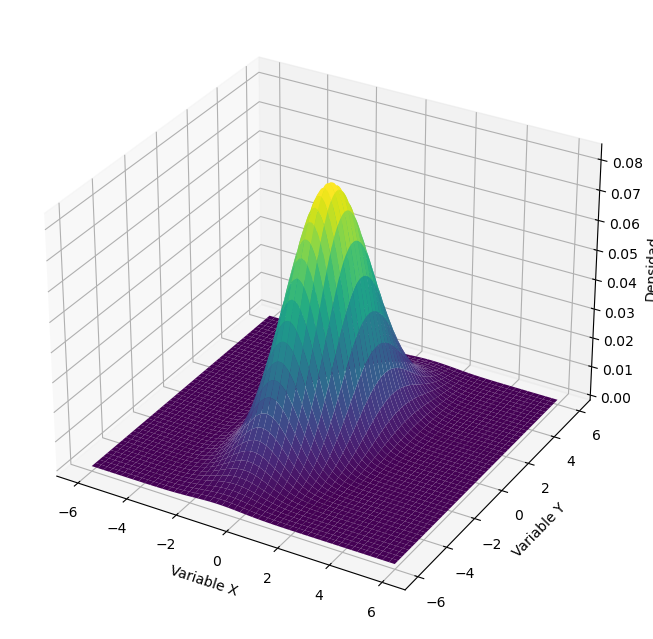

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Definir la media y la matriz de covarianza
mean = [0, 0]
cov = [[1, 0.6], [0.6, 4]]

# Crear la distribución normal bivariada
rv = multivariate_normal(mean=mean, cov=cov)

# Crear una cuadrícula de coordenadas para la trama 3D
x, y = np.mgrid[-6:6:.01, -6:6:.01]
pos = np.dstack((x, y))

# Dibujar la trama 3D de la densidad normal bivariada
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), cmap='viridis')
ax.set_xlabel('Variable X')
ax.set_ylabel('Variable Y')
ax.set_zlabel('Densidad')
plt.show()


## <span style="color:blue">Entropía cruzada</span>

En teoría de la información, la entropía cruzada entre dos distribuciones de probabilidad  $P$ y $Q$ sobre el mismo espacio muestral mide el número promedio de bits (o nats) necesarios para identificar una distribución con la otra. 

En la práctica, si se considera la distribución $P$ como la distribución verdadera y a $Q$ como una distribución aproximante, entonces la entropía cruzada se define mediante


$$
H(P,Q) = - E_P[ \log Q]  = - (p_1\log q_1 + p_2\log q_2+ \cdots + p_n\log q_n)
$$


**Interpretación**

Para la interpretación, esta es una medida de que tanto difiere $Q$ de $P$, medido en bits o nats. Entonces entre menor es este valor, mejor es la aproximación.

### Ejemplo

Para ilustrar el concepto, calculemos la entropía cruzada entre las distribuciones binomiales $ P=Bin(3, 0.3)$, $Q_1=Bin(3, 0.4)$ y $Q_2=Bin(3,0.7)$.

Vamos considerar a la distribución $P$ como la verdadera y a $Q_1$ y $Q_2$ como aproximantes. Usted debe sospechar que $Q_1$ es mejor aproximante que $Q_2$.

Veámos.

In [27]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

N, p, q1, q2  = 3, 0.3, 0.4, 0.7

P = [binom.pmf(k,N,p) for k in range(N+1)]
Q1 = [binom.pmf(k,N,q1) for k in range(N+1)]
Q2 = [binom.pmf(k,N,q2) for k in range(N+1)]

print(np.round(P,3))
print(np.round(Q1,3))
print(np.round(Q2,3))

[0.343 0.441 0.189 0.027]
[0.216 0.432 0.288 0.064]
[0.027 0.189 0.441 0.343]


In [28]:
H_P_Q1 = -np.sum(P*np.log(Q1))
H_P_Q2 = -np.sum(P*np.log(Q2))

print('H(P,Q1)= ', H_P_Q1 )
print('H(P,Q2)= ', H_P_Q2 )

H(P,Q1)=  1.205269726734411
H(P,Q2)=  2.157224596768416


Finalmente un gráfico de las ttes distribuciones.

Discuta los resultados en la clase.

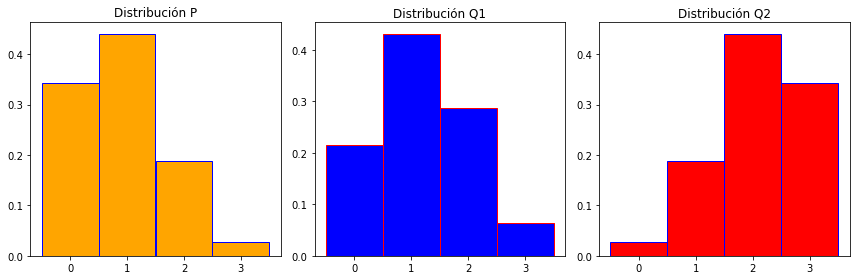

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()
label = ['0','1','2','3']

ax[0].bar(label, P, color = 'orange', edgecolor='blue',width=1)
ax[0].set_title("Distribución P")

ax[1].bar(label, Q1, color = 'blue', edgecolor='red',width=1)
ax[1].set_title("Distribución Q1")

ax[2].bar(label, Q2, color = 'red', edgecolor='blue',width=1)
ax[2].set_title("Distribución Q2")

fig.tight_layout()
plt.show()

## <span style="color:blue">Entropía cruzada en aprendizaje de máquinas</span>

Recordemos que  que una red neuronal de clasificación transforma un tensores de entrada en  una distribuciones. Tal distribución indica las probsbilidades de que el tensor de entrada pertezca a cada una de las clases.

En el entrenamiento se busca encontrar los pesos sinápticos que minimizan conjuntamente la entropía cruzada entre la distribución de salida de los tensores calculada por la red neuronal y la distribución verdadera asociada a cada tensor.

Por ejemplo, supongamos que se tienen tres clases y que para un determinado tensor la clase asociada es la 1 (las posibles clases son 0,1,2).

Entonces, la distribución verdadera en este caso es $P=(0,1,0)$. Por otro lado, supongamos que la distribución que calcula la red neuronal para este tensor es $Q= (0.2, 0.7, 0.1)$. Entonces, la entropía cruzada para este tensor es dada por

$$
H(P,Q) = - 1 \log 0.7 = 0.357
$$

- [Regresar al inicio](#Contenido)